In [20]:
using StatsBase
using Random
using Plots; gr();
using Distributions
using ProgressMeter: @showprogress

In [72]:
# Create a realization of a grid of gaussianly distributed random vars
# Use rejection sampling b/c want to be able 
# to sub out gaussian for posterior comp
function seq_sim(means, stds, border=2)
    out = fill(NaN, size(means))
    
    # Random order of visits 
    indices = []
    for i in (1+border):(size(out,1)-border)
        for j in (1+border):(size(out,2)-border)
            push!(indices, (i,j))
        end
    end
    perm = randperm(length(indices))
    indices = indices[perm]
    
    dist_map = Dict()
    
    @showprogress "Indices..." for (idx, visit) in enumerate(indices)
#         if idx > length(indices)/2
#             border = 1 # most squares will have adjacent 
#         end
        for t in 1:100000
            proposal = randn()*stds[visit[1],visit[2]] + means[visit[1],visit[2]]
            p_accept = 1 
            max_p = 1
            n_filled = 0 
            for i in -border:border
                for j in -border:border
                    if (i == 0) & (j==0)
                        continue
                    end
                    if isnan(out[visit[1]+i, visit[2]+j]) 
                        continue
                    end
                    d = sqrt(i^2 + j^2)
                    g = get!(dist_map, d, Gamma(1,d))
                    p_accept *= pdf(g, abs(proposal - out[visit[1]+i, visit[2]+j]))
                    max_p *= pdf(g, 0)
                    n_filled += 1 
                end
            end
            #println("max prob $max_p")
            #println(.25^n_filled)
            if rand()*max_p < p_accept
            #if rand()*.25^n_filled < p_accept
                out[visit[1],visit[2]] = proposal 
                break
            end
        end
    end
    
    return out
end 

seq_sim (generic function with 2 methods)

In [73]:
a = seq_sim([0 0 0 1; 0 0 1 1; 0 1 1 1; 0 0 0 0], fill(.5, (3,3)), 1)

4×4 Array{Float64,2}:
 NaN  NaN         NaN         NaN
 NaN   -0.206554    0.816341  NaN
 NaN    0.521665    0.862906  NaN
 NaN  NaN         NaN         NaN

In [69]:
big = fill(3.0, (50,50))
for i in 1:size(big,1)
    for j in 1:size(big,2)
        if (2*i+j) < 100
            big[i,j] = 5
        end
    end
end

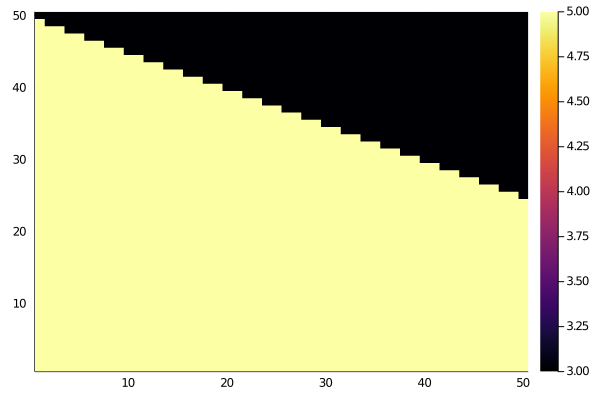

In [70]:
heatmap(big)

Indices...100%|█████████████████████████████████████████| Time: 0:05:26


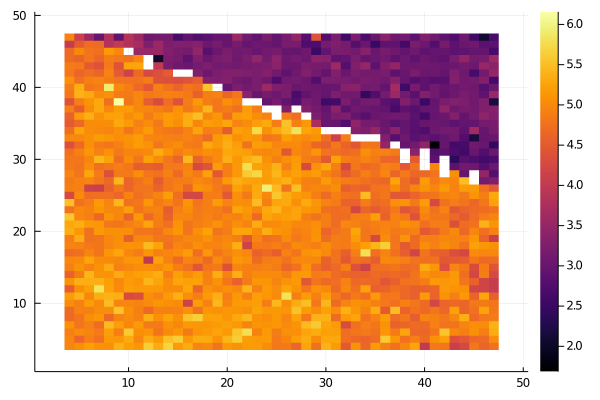

In [74]:
out_2 = seq_sim(big, fill(.5, size(big)), 3)
heatmap(out_2)

Indices...100%|█████████████████████████████████████████| Time: 0:00:30


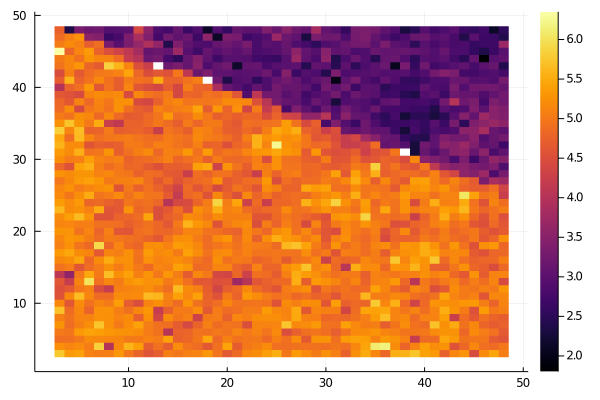

In [76]:
out_2 = seq_sim(big, fill(.5, size(big)), 2)
heatmap(out_2)

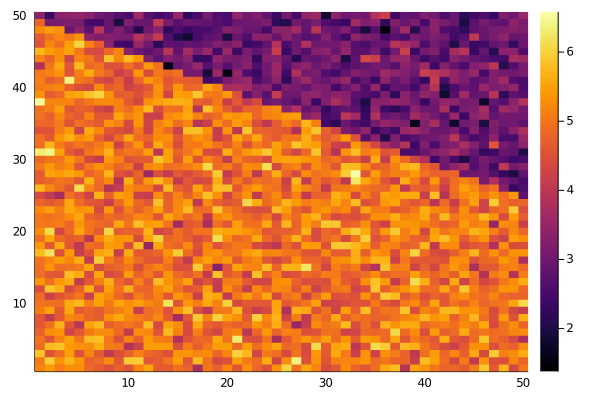

In [32]:
no_spatial = fill(NaN, size(out))
for i in 1:size(out,1)
    for j in 1:size(out, 2)
        no_spatial[i,j] = randn()*.5 + big[i,j]
    end
end

heatmap(no_spatial)

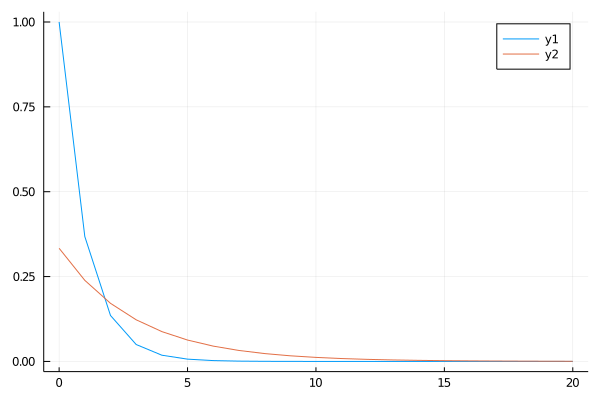

In [17]:
g = Gamma(1,1)
g2 = Gamma(1,3)
plot(0:20, [pdf(g, a) for a in 0:20])
plot!(0:20, [pdf(g2, a) for a in 0:20])


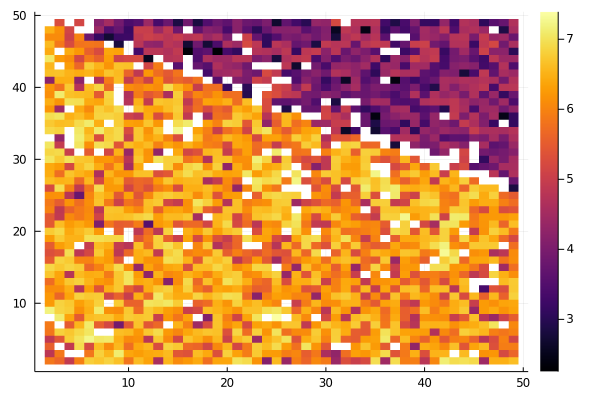

In [34]:
heatmap(out)

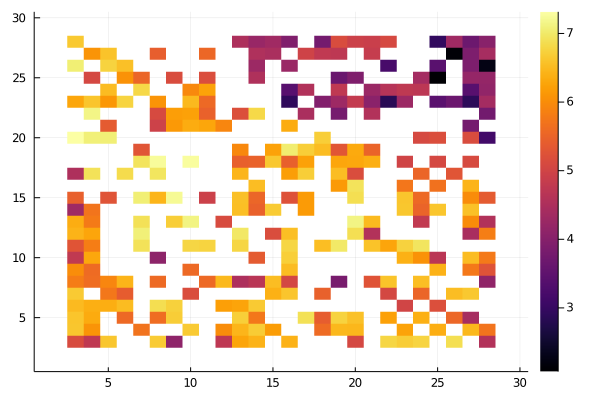

In [55]:
heatmap(out_2)